In [2]:
!pip3 install shap

In [ ]:
from simulations import simulation1
from shapley_values.causal_shap import Explainer, ShapleyValuesType
from sklearn.model_selection import train_test_split
from shapley_values.utils import get_baseline
import numpy as np
from xgboost import XGBRegressor
import shap

np.random.seed(0)

X, y = simulation1(num_samples=10000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

feature_names = ['Parental income', "School funding"]

sample = X_test[0]

explainer = Explainer(X = X_train, model = model, is_classification=False)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.CONDITIONAL)

In [5]:
explanation = shap.Explanation(values=np.array(list(phis.values())),
                                feature_names=feature_names,
                                base_values=get_baseline(X_train, model),  # Predicted value for the sample
                                output_names=['Prediction'])

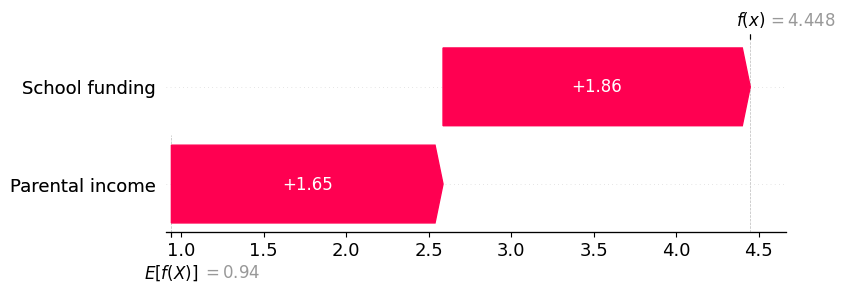

In [6]:
shap.plots.waterfall(explanation)